<a href="https://colab.research.google.com/github/IrfanPavel/Predicting-The-Sale-Price-of-BullDoz_updateders/blob/main/Predicting_The_Sale_Price_of_BullDozers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/TrainAndValid.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14180 entries, 0 to 14179
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   SalesID                   14180 non-null  int64 
 1   SalePrice                 14180 non-null  int64 
 2   MachineID                 14180 non-null  int64 
 3   ModelID                   14180 non-null  int64 
 4   datasource                14180 non-null  int64 
 5   auctioneerID              14180 non-null  int64 
 6   YearMade                  14180 non-null  int64 
 7   MachineHoursCurrentMeter  14180 non-null  int64 
 8   UsageBand                 12428 non-null  object
 9   saledate                  14180 non-null  object
 10  fiModelDesc               14180 non-null  object
 11  fiBaseModel               14180 non-null  object
 12  fiSecondaryDesc           9177 non-null   object
 13  fiModelSeries             2051 non-null   object
 14  fiModelDescriptor     

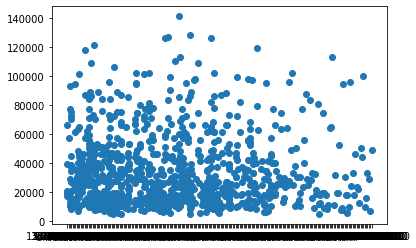

In [4]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

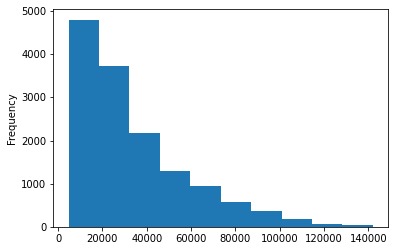

In [5]:
df.SalePrice.plot.hist()

In [6]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14175,1185604,30000,593789,3539,121,3,2006,1012,Medium,11/25/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14176,1185605,25000,1018406,7271,121,3,1000,822,Low,12/3/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
14177,1185609,51000,1009056,77,121,3,1000,7751,Low,12/11/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
14178,1185613,111000,530738,24286,121,3,1996,10959,Medium,12/4/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,Differential Steer,NaN,NaN


# **Parsing dates**

In [7]:
df=pd.read_csv("/content/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [8]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17704 entries, 0 to 17703
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   17704 non-null  int64         
 1   SalePrice                 17704 non-null  int64         
 2   MachineID                 17704 non-null  int64         
 3   ModelID                   17704 non-null  int64         
 4   datasource                17704 non-null  int64         
 5   auctioneerID              17704 non-null  int64         
 6   YearMade                  17704 non-null  int64         
 7   MachineHoursCurrentMeter  17704 non-null  int64         
 8   UsageBand                 15572 non-null  object        
 9   saledate                  17704 non-null  datetime64[ns]
 10  fiModelDesc               17704 non-null  object        
 11  fiBaseModel               17704 non-null  object        
 12  fiSecondaryDesc   

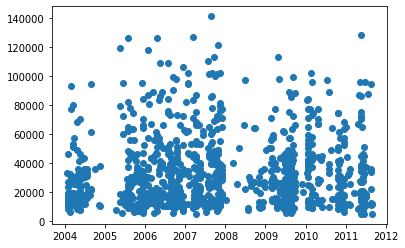

In [10]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [11]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [12]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

# **Sort DataFrame by saleDate**

In [13]:
df.sort_values(by=["saledate"],inplace=False,ascending=True)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
7648,1165000,27000,733687,7057,121,3,1995,4368,Medium,2004-01-05,...,24 inch,"9' 10""",Manual,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
8228,1166933,10750,1035166,8861,121,3,2002,603,Low,2004-01-09,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
6770,1162057,35000,1060038,4763,121,3,1999,479,Low,2004-01-16,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
4051,1152803,30000,1000789,12263,121,3,1998,4302,Medium,2004-01-19,...,None or Unspecified,None or Unspecified,Hydraulic,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
5086,1156368,19000,1060567,3822,121,3,1990,0,NaN,2004-01-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,1173224,55000,1042053,5889,121,3,1000,5788,Low,2011-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
10022,1173242,13000,1024580,9580,121,3,2006,1685,Medium,2011-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10023,1173247,11000,1055519,9580,121,3,2005,1605,Medium,2011-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,1173108,38000,21346,1580,121,3,2003,3651,Medium,2011-09-02,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN


# **Make a copy of the Original DataFrame**

In [14]:
df_tmp=df.copy()

In [15]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,1199978,22000,1025080,3172,121,3,2001,3920,Medium,2010-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17700,1199981,29500,1063509,18189,121,3,2006,1478,Low,2010-04-08,...,16 inch,None or Unspecified,Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
17701,1199986,40000,28303,77,121,3,1000,30219,High,2010-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
17702,1199987,56000,24632,3857,121,3,1000,53234,High,2010-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


# **Add datetime parameters for saledate column**


In [16]:
df_tmp["SaleYear"]=df_tmp.saledate.dt.year
df_tmp["SaleMonth"]=df_tmp.saledate.dt.month
df_tmp["SaleDay"]=df_tmp.saledate.dt.day
df_tmp["SaleDayofweek"]=df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayofyear"]=df_tmp.saledate.dt.dayofyear

df_tmp.drop("saledate",axis=1,inplace=False)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayofweek,SaleDayofyear
0,1139246,66000,999089,3157,121,3,2004,68,Low,521D,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000,117657,77,121,3,1996,4640,Low,950FII,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000,434808,7009,121,3,2001,2838,High,226,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500,1026470,332,121,3,2001,3486,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,1199978,22000,1025080,3172,121,3,2001,3920,Medium,580M,...,NaN,NaN,NaN,NaN,NaN,2010,4,1,3,91
17700,1199981,29500,1063509,18189,121,3,2006,1478,Low,ECR58,...,NaN,NaN,NaN,NaN,NaN,2010,4,8,3,98
17701,1199986,40000,28303,77,121,3,1000,30219,High,950FII,...,NaN,NaN,NaN,Standard,Conventional,2010,4,1,3,91
17702,1199987,56000,24632,3857,121,3,1000,53234,High,966F,...,NaN,NaN,NaN,Standard,Conventional,2010,4,1,3,91


In [17]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayofweek,SaleDayofyear
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204


In [18]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'SaleYear',
       'SaleMonth', 'SaleDay', 'SaleDayofweek', 'SaleDayofyear'],

In [19]:
df_tmp["state"]

0               Alabama
1        North Carolina
2              New York
3                 Texas
4              New York
              ...      
17699             Texas
17700             Idaho
17701           Alabama
17702           Alabama
17703          Kentucky
Name: state, Length: 17704, dtype: object

In [20]:
df_tmp.state.value_counts()

Florida           2050
Texas             2032
California        1314
Georgia           1023
North Carolina     943
Alabama            604
Louisiana          599
Illinois           496
Ohio               452
West Virginia      399
Arizona            398
Colorado           394
Nevada             383
Tennessee          374
Missouri           373
Pennsylvania       371
Michigan           351
Virginia           351
Utah               323
South Carolina     312
New York           294
Kentucky           277
Oklahoma           258
Indiana            245
Mississippi        218
Maryland           216
Washington         210
Wisconsin          205
Minnesota          204
New Jersey         201
Arkansas           198
Kansas             177
Idaho              176
Oregon             175
Iowa               170
Wyoming            137
New Mexico         136
Massachusetts      107
New Hampshire       70
Delaware            68
South Dakota        66
North Dakota        62
Hawaii              55
Maine      

In [21]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp.SalePrice)

ValueError: ignored

In [22]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                    2132
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              6070
fiModelSeries               14952
fiModelDescriptor           13199
ProductSize                  9029
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                13845
Enclosure                      12
Forks                        9031
Pad_Type                    14864
Ride_Control                11946
Stick                       14864
Transmission                10935
Turbocharged                14864
Blade_Extension             16688
Blade_Width   

# **Convert strings into categories**

In [23]:
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [24]:
#Convert the strings into categories

for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label]=content.astype("category").cat.as_ordered()

In [25]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17704 entries, 0 to 17703
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   17704 non-null  int64         
 1   SalePrice                 17704 non-null  int64         
 2   MachineID                 17704 non-null  int64         
 3   ModelID                   17704 non-null  int64         
 4   datasource                17704 non-null  int64         
 5   auctioneerID              17704 non-null  int64         
 6   YearMade                  17704 non-null  int64         
 7   MachineHoursCurrentMeter  17704 non-null  int64         
 8   UsageBand                 15572 non-null  category      
 9   saledate                  17704 non-null  datetime64[ns]
 10  fiModelDesc               17704 non-null  category      
 11  fiBaseModel               17704 non-null  category      
 12  fiSecondaryDesc   

In [26]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [27]:
df_tmp.state.cat.codes

0         0
1        32
2        31
3        42
4        31
         ..
17699    42
17700    11
17701     0
17702     0
17703    16
Length: 17704, dtype: int8

In [28]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.000000
UsageBand                   0.120425
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342860
fiModelSeries               0.844555
fiModelDescriptor           0.745538
ProductSize                 0.509998
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.782027
Enclosure                   0.000678
Forks                       0.510111
Pad_Type                    0.839584
Ride_Control                0.674763
Stick                       0.839584
Transmission                0.617657
T

In [29]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                    2132
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              6070
fiModelSeries               14952
fiModelDescriptor           13199
ProductSize                  9029
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                13845
Enclosure                      12
Forks                        9031
Pad_Type                    14864
Ride_Control                11946
Stick                       14864
Transmission                10935
Turbocharged                14864
Blade_Extension             16688
Blade_Width   

# **Save Processed Data**

In [30]:
df_tmp.to_csv("Users\Irfan\OneDrive\Desktop\Data Science",index=False)

In [31]:
df_tmp=pd.read_csv("/content/Users\Irfan\OneDrive\Desktop\Data Science",low_memory=False)

In [32]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayofweek,SaleDayofyear
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,1199978,22000,1025080,3172,121,3,2001,3920,Medium,2010-04-01,...,NaN,NaN,NaN,NaN,NaN,2010,4,1,3,91
17700,1199981,29500,1063509,18189,121,3,2006,1478,Low,2010-04-08,...,NaN,NaN,NaN,NaN,NaN,2010,4,8,3,98
17701,1199986,40000,28303,77,121,3,1000,30219,High,2010-04-01,...,NaN,NaN,NaN,Standard,Conventional,2010,4,1,3,91
17702,1199987,56000,24632,3857,121,3,1000,53234,High,2010-04-01,...,NaN,NaN,NaN,Standard,Conventional,2010,4,1,3,91


# **Filling Numerical Values First**

In [33]:
for label,contents in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
SaleYear
SaleMonth
SaleDay
SaleDayofweek
SaleDayofyear


In [34]:
#Check for which Numeric columns have null values

for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [35]:
#Fill numeric rows with the median
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_tmp[label+"is_missing"]=pd.isnull(content)
      df_tmp[label]=content.fillna(content.median())


In [36]:
#Turn Categorical variables into numbers

for label,content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_tmp[label+"is_missing"]=pd.isnull(content)
    df_tmp[label]=pd.Categorical(content).codes+1


In [37]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17704 entries, 0 to 17703
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(45), int16(3), int64(13), int8(42)
memory usage: 3.3 MB


In [38]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [39]:
%%time
model=RandomForestRegressor(n_jobs=1)
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp.SalePrice)

CPU times: user 24 s, sys: 124 ms, total: 24.1 s
Wall time: 25.3 s


In [40]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp.SalePrice)

0.9838834850484844

In [41]:
#Split data into Training and Validation
df_val=df_tmp[df_tmp.SaleYear==2011]
df_train=df_tmp[df_tmp.SaleYear!=2011]

In [42]:
df_val

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
3,1139251,38500,1026470,332,121,3,2001,3486,1,662,...,True,True,True,True,True,True,True,True,True,True
35,1139382,10000,1068548,112,121,3,1000,3981,2,673,...,True,True,True,True,True,True,True,True,False,False
36,1139390,8250,1011114,7110,121,3,1000,0,0,662,...,True,True,True,True,True,True,True,True,True,True
39,1139409,51000,999090,3362,121,3,1000,2223,2,675,...,True,True,True,True,True,True,True,True,True,True
44,1139421,32000,1048704,2797,121,3,2000,3817,2,676,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10050,1173381,66000,1043552,2768,121,3,1000,0,0,705,...,True,True,True,True,True,False,False,False,True,True
10051,1173383,7500,1015544,20241,121,3,2006,412,2,705,...,True,True,True,True,True,True,True,True,True,True
10052,1173386,110000,270678,23931,121,3,2003,8568,3,704,...,True,True,True,True,True,True,True,True,True,True
10053,1173387,24500,732533,1580,121,3,2006,3391,3,704,...,True,True,True,True,True,False,False,False,True,True


In [43]:
df_train

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1139246,66000,999089,3157,121,3,2004,68,2,171,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000,117657,77,121,3,1996,4640,2,18,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000,434808,7009,121,3,2001,2838,1,13,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000,1057373,17311,121,3,2007,722,3,385,...,True,True,True,True,True,True,True,True,True,True
5,1139255,26500,1001274,4605,121,3,2004,508,2,299,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17699,1199978,22000,1025080,3172,121,3,2001,3920,3,501,...,True,True,True,True,True,True,True,True,True,True
17700,1199981,29500,1063509,18189,121,3,2006,1478,2,504,...,False,False,False,False,False,True,True,True,True,True
17701,1199986,40000,28303,77,121,3,1000,30219,1,501,...,True,True,True,True,True,True,True,True,False,False
17702,1199987,56000,24632,3857,121,3,1000,53234,1,501,...,True,True,True,True,True,True,True,True,False,False


In [44]:
#Split Data into X and Y
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

# **Building an Evaluation Function**

In [45]:
#Create an evaluation function
from sklearn.metrics import mean_squared_log_error,mean_absolute_error


def rmsle(y_test,y_preds):
  return np.sqrt(mean_squared_log_error(y_test,y_preds))


#Create a function to evaluate our Model

def show_scores(model):
  train_preds=model.predict(X_train)
  val_preds=model.predict(X_valid)
  scores={"training MAE": mean_absolute_error(y_train,train_preds),
          "Valid MAE":mean_absolute_error(y_valid,val_preds),
          "Training RMSLE":rmsle(y_train,train_preds),
          "Valid RMSLE":rmsle(y_valid,val_preds),
          "Training R^2":model.score(X_train,y_train),
          "Valid R^2": model.score(X_valid,y_valid)}
  return scores




# **Testing Our Model On subset**

In [46]:
model=RandomForestRegressor(n_jobs=1,max_samples=10000)

In [47]:
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=1)

In [48]:
show_scores(model)

{'Training RMSLE': 0.1465768012082256,
 'Training R^2': 0.9633125764978202,
 'Valid MAE': 6744.425829959514,
 'Valid RMSLE': 0.29440706683799683,
 'Valid R^2': 0.8095469747605193,
 'training MAE': 2992.375029911462}

# **Hyperparameter Tuning with RandomizedSeachCV **

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]}

rs_model=RandomizedSearchCV(RandomForestRegressor(),
                            param_distributions=rf_grid,
                            n_iter=20,
                            cv=5,
                            verbose=True)

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 1min 49s, sys: 603 ms, total: 1min 50s
Wall time: 1min 50s


In [50]:
rs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'max_samples': 10000,
 'min_samples_leaf': 5,
 'min_samples_split': 18,
 'n_estimators': 20}

In [51]:
show_scores(rs_model)

{'Training RMSLE': 0.21843838619337083,
 'Training R^2': 0.904958576515477,
 'Valid MAE': 7132.776501032616,
 'Valid RMSLE': 0.3056783971466255,
 'Valid R^2': 0.7918132791949936,
 'training MAE': 4827.5689690027075}

# **Train a model with best Parameters**

In [52]:
%%time
ideal_model=RandomForestRegressor(n_estimators=90,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None)

ideal_model.fit(X_train,y_train)

CPU times: user 11.5 s, sys: 31.8 ms, total: 11.5 s
Wall time: 6.05 s


In [53]:
show_scores(ideal_model)

{'Training RMSLE': 0.16393554316794373,
 'Training R^2': 0.9507251906752338,
 'Valid MAE': 6695.871166588369,
 'Valid RMSLE': 0.2896513304390022,
 'Valid R^2': 0.8132876338066087,
 'training MAE': 3516.4969473188285}

In [54]:
%%time
#Faster Model
fast_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=3,
                                 max_features=0.5,
                                 n_jobs=-1)

fast_model.fit(X_train,y_train)

CPU times: user 5.52 s, sys: 13.9 ms, total: 5.54 s
Wall time: 2.93 s


In [55]:
show_scores(fast_model)

{'Training RMSLE': 0.14502587923869756,
 'Training R^2': 0.9617387300689733,
 'Valid MAE': 6744.201339514809,
 'Valid RMSLE': 0.29200422314474966,
 'Valid R^2': 0.8111310243662968,
 'training MAE': 2997.1035081557075}

# **Make Predictions on test data**

In [81]:
df_test = pd.read_csv("/content/Test.csv",
                      parse_dates=["saledate"])

In [63]:
model.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingis_missing
- Blade_Extensionis_missing
- Blade_Typeis_missing
- Blade_Widthis_missing
- Coupler_Systemis_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

# ***preprocessing data***

In [64]:
def preprocess_data(df):
  df["SaleYear"]=df.saledate.dt.year
  df["SaleMonth"]=df.saledate.dt.month
  df["SaleDay"]=df.saledate.dt.day
  df["SaleDayofweek"]=df.saledate.dt.dayofweek
  df["SaleDayofyear"]=df.saledate.dt.dayofyear

  df.drop("saledate",axis=1,inplace=True)
  #Fill numeric rows with the median
  for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        df_tmp[label+"is_missing"]=pd.isnull(content)
        df_tmp[label]=content.fillna(content.median())
    

    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1
    
  return df
  


  


In [82]:
df_test=preprocess_data(df_test)

In [83]:
set(X_train.columns) - set(df_test.columns)

{'Backhoe_Mountingis_missing',
 'Blade_Extensionis_missing',
 'Blade_Typeis_missing',
 'Blade_Widthis_missing',
 'Coupler_Systemis_missing',
 'Coupleris_missing',
 'Differential_Typeis_missing',
 'Drive_Systemis_missing',
 'Enclosure_Typeis_missing',
 'Enclosureis_missing',
 'Engine_Horsepoweris_missing',
 'Forksis_missing',
 'Grouser_Tracksis_missing',
 'Grouser_Typeis_missing',
 'Hydraulics_Flowis_missing',
 'Hydraulicsis_missing',
 'Pad_Typeis_missing',
 'Pattern_Changeris_missing',
 'ProductGroupDescis_missing',
 'ProductGroupis_missing',
 'ProductSizeis_missing',
 'Pushblockis_missing',
 'Ride_Controlis_missing',
 'Ripperis_missing',
 'Scarifieris_missing',
 'Steering_Controlsis_missing',
 'Stick_Lengthis_missing',
 'Stickis_missing',
 'Thumbis_missing',
 'Tip_Controlis_missing',
 'Tire_Sizeis_missing',
 'Track_Typeis_missing',
 'Transmissionis_missing',
 'Travel_Controlsis_missing',
 'Turbochargedis_missing',
 'Undercarriage_Pad_Widthis_missing',
 'UsageBandis_missing',
 'fiBaseM

In [84]:
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayofweek,SaleDayofyear,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,2012,5,3,3,124,False
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,Standard,Conventional,2012,5,10,3,131,False
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,2012,5,10,3,131,False
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,2012,5,10,3,131,False
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131,False


# **Feature Importance**

In [71]:
ideal_model.feature_importances_

array([8.59836405e-03, 2.41934817e-02, 4.04963019e-02, 0.00000000e+00,
       0.00000000e+00, 1.15610722e-01, 2.26982114e-02, 2.21420473e-03,
       3.96373395e-02, 3.83282729e-02, 2.99882672e-02, 5.26746869e-02,
       4.85623996e-03, 8.68934740e-03, 6.88525239e-02, 7.35263057e-02,
       6.04799137e-03, 9.31286773e-03, 8.25115859e-03, 1.74576737e-03,
       1.42206989e-01, 4.36369830e-04, 2.62027311e-04, 3.99502983e-04,
       1.22144378e-04, 9.67278850e-03, 2.86547592e-05, 5.11534141e-04,
       2.10391734e-03, 8.07575495e-04, 7.62435721e-04, 1.04707464e-02,
       8.64763741e-04, 9.63790362e-03, 4.56524435e-04, 7.84966206e-04,
       5.37520015e-03, 1.12927949e-03, 7.16935009e-02, 7.43062416e-03,
       7.33403063e-03, 5.19842231e-03, 1.05424649e-03, 1.16712105e-03,
       6.67296268e-04, 6.00311188e-04, 6.36811883e-04, 3.63831131e-04,
       6.03513938e-03, 8.77041606e-03, 2.81479084e-04, 2.84479109e-04,
       1.13156255e-02, 2.44082240e-03, 4.61155430e-03, 9.45329796e-04,
      

In [72]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

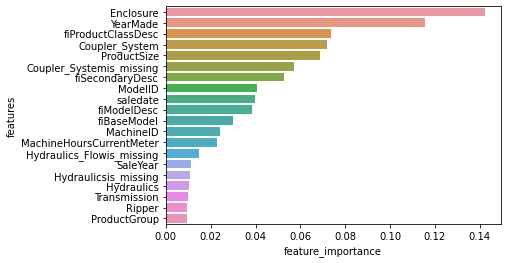

In [73]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [74]:
sum(ideal_model.feature_importances_)

0.9999999999999998

In [75]:
df.ProductSize.isna().sum()

9029

In [76]:
df.ProductSize.value_counts()

Medium            2772
Large / Medium    2584
Mini              1459
Small              946
Large              747
Compact            167
Name: ProductSize, dtype: int64

In [78]:
df.Turbocharged.value_counts()

None or Unspecified    2684
Yes                     156
Name: Turbocharged, dtype: int64

In [77]:
df.Thumb.value_counts()

None or Unspecified    3917
Manual                  573
Hydraulic               436
Name: Thumb, dtype: int64